# Lab 1 conducted and written by Erik Lindvall and Simon Palm

[3.2363000000009206, 3.498500000001474, 3.5546000000015923, 3.566700000001618]
[3.303800000001063, 3.5774000000016404, 3.6304000000017522, 3.6451000000017832]


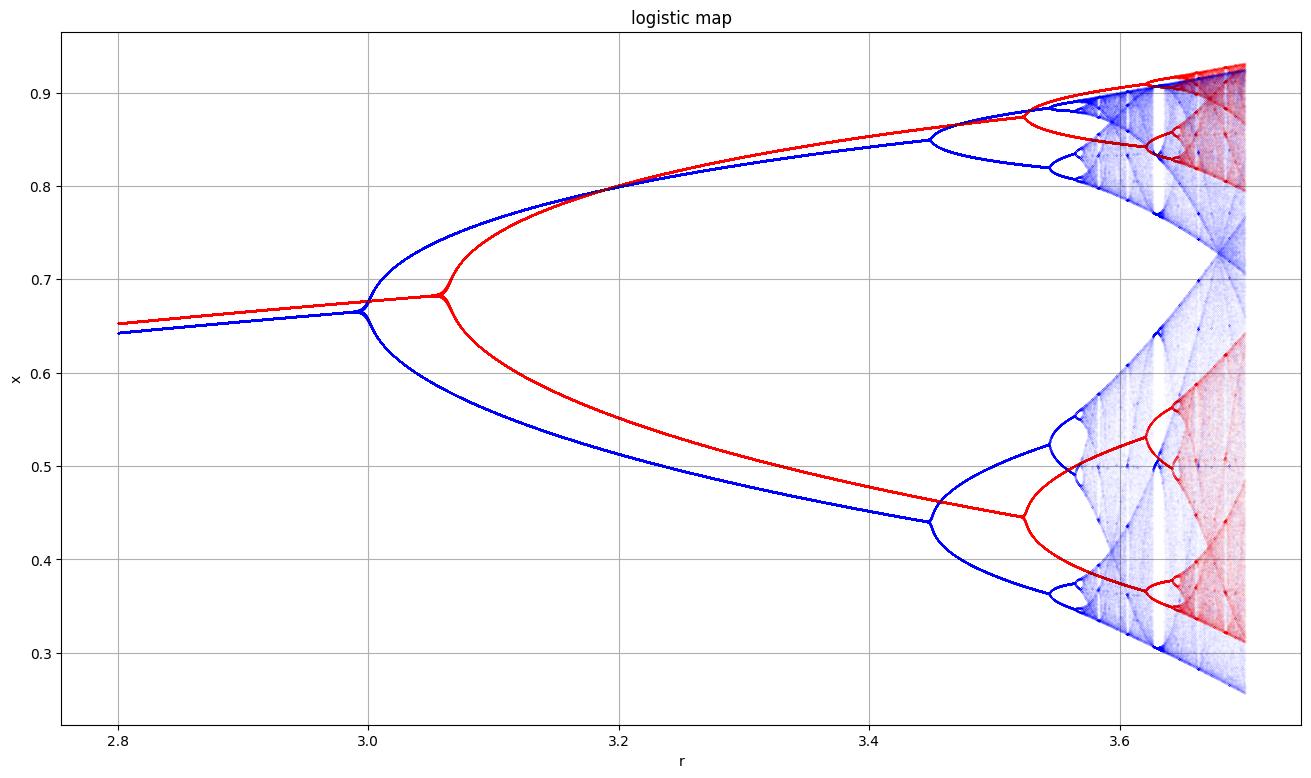

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Feigenbaum constant
epsilon = 10**-6
split1 = []
split2 = []
def diff1(r,x):
    return r-2*r*x 

def diff2(r,x):
    return r-2*r*x + 0.4*x**3

def Lyapunov(r,points,dfunc):
    tail = points[-200:]
    difftail = [np.log(abs(dfunc(r,point))) for point in tail]
    return np.mean(difftail)

def closest_value(input_list, input_value):

  array = np.asarray(input_list)

  i = (np.abs(array - input_value)).argmin()

  return array[i]

interval = (2.8,3.7)  # start, end
accuracy = 0.0001
reps = 600  # number of repetitions
numtoplot = 200
lims = np.zeros(reps)
blims = np.zeros(reps)

fig, biax = plt.subplots()
fig.set_size_inches(16, 9)
l1 = []
r1 = []
l2 = []
r2 = []
rhalf1 = []
rhalf2 = []
np.random.seed(0)
lims[0] = np.random.rand() # Initial value
blims[0] = lims[0]
for r in np.arange(interval[0], interval[1], accuracy):
    for i in range(reps-1):
        lims[i+1] = r*lims[i]*(1-lims[i]) 
        blims[i+1] = r*blims[i]*(1-blims[i]) + 0.1*blims[i]**4 # Logistic map with perturabtion
    l1temp = Lyapunov(r,lims,diff1)
    l2temp = Lyapunov(r,blims,diff2)
    
    l1.append(l1temp)
    r1.append(r)
    
    l2.append(l2temp)
    r2.append(r)
    
    #loop for storing r-values where our plot intersects the map maximum (for calculating Feigenbaum's 2nd constant)
    n1 = 0
    n2 = 0
    vals1 = lims[reps-numtoplot:]
    vals2 = blims[reps-numtoplot:]
    for i in range(len(vals1)):
        if vals1[i] < 0.5 + accuracy and vals1[i] > 0.5-accuracy: #checking that we're within close enough to the map maximum 0.5
                rhalf1.append(r)
                n1 += 1
                if len(rhalf1)>1 and abs(rhalf1[n1-1]-rhalf1[n1-2]) < 0.01: #to avoid multiple values for the same intersection
                    rhalf1.pop(n1-1)
                    n1 -= 1
        #Same but for blims
        if vals2[i] < 0.509 + accuracy and vals2[i] > 0.509-accuracy: #checking that we're within close enough to 0.509
                rhalf2.append(r)
                n2 += 1
                if len(rhalf2)>1 and abs(rhalf2[n2-1]-rhalf2[n2-2]) < 0.01: #to avoid multiple values for the same intersection
                    rhalf2.pop(n2-1)
                    n2 -= 1

    biax.plot([r]*numtoplot, lims[reps-numtoplot:], 'b.', markersize=.02)
    biax.plot([r]*numtoplot, blims[reps-numtoplot:], 'r.', markersize=.02)

#We only need a few values and the later values become unreliable due too so close together bifurcations
rhalf1=rhalf1[0:4] 
rhalf2=rhalf2[0:4] 
print(rhalf1)
print(rhalf2)

biax.set(xlabel='r', ylabel='x', title='logistic map')
plt.grid()
plt.show()




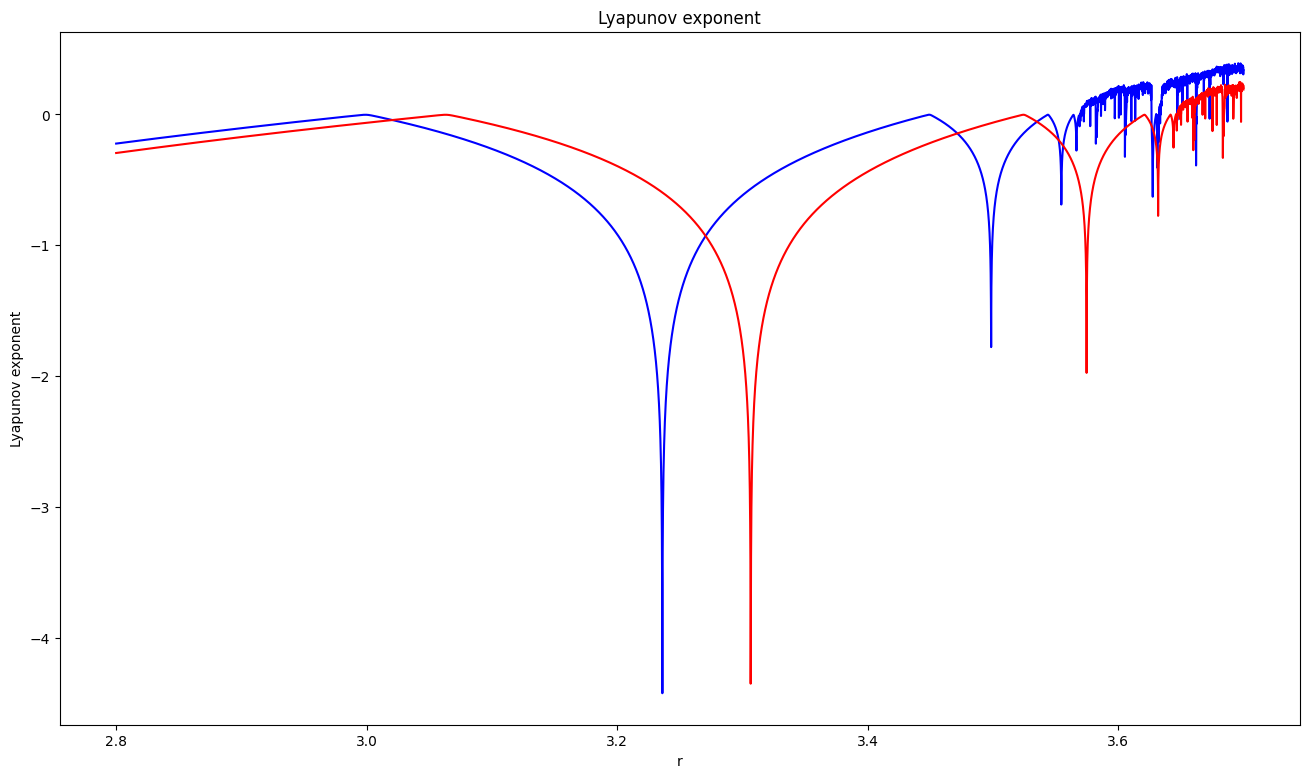

In [2]:
# Plot Lyapunov exponent
fig, biax = plt.subplots()
fig.set_size_inches(16, 9)
biax.plot(r1,l1,'b')
biax.plot(r2,l2,'r')
biax.set(xlabel='r', ylabel='Lyapunov exponent', title='Lyapunov exponent')
plt.show()


In [10]:
# Find splits

split1 = []
for i in range(1, len(l1)-1):
    if l1[i] > l1[i-1] and l1[i] > l1[i+1]:
        split1.append(r1[i])

split2 = []
for i in range(1, len(l2)-1):
    if l2[i] > l2[i-1] and l2[i] > l2[i+1]:
        split2.append(r2[i])

# 1st Feigenbaum constant
f1 = (split1[2]-split1[1])/(split1[3]-split1[2])
print("1st Feigenbaum constant (unperturbed): " + str(f1))
f2 = (split2[2]-split2[1])/(split2[3]-split2[2])
print("1st Feigenbaum constant (perturbed): " + str(f2))
print()
print()
r1splits = split1[:3]
r2splits = split2[:3]
values1 = {}
values2 = {}

n = 1
for r in rhalf1:
    N = 2**n
    for i in range(reps-1):
        lims[i+1] = r*lims[i]*(1-lims[i]) 
    print()
    print(r)
    print(lims[-N:])
    #values1[n] = lims[-N:]
    n += 1
n = 1
for r in rhalf2:
    N =2**n
    for i in range(reps-1):
        blims[i+1] = r*blims[i]*(1-blims[i]) + 0.1*blims[i]**4 # Logistic map with perturabtion
    #values2[n] = blims[-N:]
    n += 1

 
#Här måste vi lösa hur man ska få ut de korrekta av alternativen 0.5 är alltid ett av dem

#Unperturbed
# 1st: 0.80544248 
# 2nd: 0.3699521
# 3rd: 0.55082778 (?)
# 4th: 0.48161132

#Perturbed
# 1st: 0.83107353
# 2nd: 0.38235398
# 3rd: 0.55944107
# 4th: 0.48652278

# abs(0.5 - number above)/abs(0.5 - next number above) = 2.5 ungefär

1st Feigenbaum constant (unperturbed): 4.642156862745098
1st Feigenbaum constant (perturbed): 4.644230769230769



3.2363000000009206
[0.49991986 0.80907498]

3.498500000001474
[0.49996178 0.87462499 0.38363191 0.82724995]

3.5546000000015923
[0.54593318 0.8811503  0.37225352 0.8306419  0.50004667 0.88864999
 0.35173188 0.81050768]

3.566700000001618
[0.55891934 0.87929324 0.37855754 0.83907234 0.48161132 0.89046894
 0.34787453 0.80913387 0.55082778 0.88246056 0.3699521  0.83135334
 0.50006904 0.89167498 0.34451008 0.80544248]


We see here that the first Feigenbaum constant is pretty close to the value it is supposed to converge to, even after the second measurement. The constant is practically the same for both the perturbed and unperturbed map.

In [4]:
d1 = []
d2 = []
tinevalue1 = [0.80907, 0.38364, 0.54593, 0.48161] #the opposing graph value to the one that intersected the unimodal map (opposed to 0.5)
tinevalue2 = [0.83239, 0.38558, 0.55324, 0.48652] #the opposing graph value to the one that intersected the perturbed unimodal map (opposed to 0.509)
for val in tinevalue1:
    d1.append(abs(0.5-val))
for val in tinevalue2:
    d2.append(abs(0.509-val))
#Our second Feigenbaum constant is given by d_i/d_i+1
for i in range(len(tinevalue1)-1):
    print('2nd Feigenbaum constant (unperturbed): ' + str(d1[i]/d1[i+1]))
    print('2nd Feigenbaum constant (perturbed): ' + str(d2[i]/d2[i+1]))

2nd Feigenbaum constant (unperturbed): 2.6561533172911647
2nd Feigenbaum constant (perturbed): 2.620239831469777
2nd Feigenbaum constant (unperturbed): 2.5334204223818846
2nd Feigenbaum constant (perturbed): 2.7897830018083223
2nd Feigenbaum constant (unperturbed): 2.497553017944534
2nd Feigenbaum constant (perturbed): 1.9679715302491079


We see that the unperturbed constant is quite close to the theoretical value and seem to converge to it. With the perturbed one, the constant is initially quite close but seems to stray further from the theoretical value for later measurements. One explaination of this could be that the solution only includes the last 200 iterated points, meaning that in the later splits, each branch get fewer points to represent its value. This produces a random error that could give rise to this difference.

# Part 2


y evaluated at time t = 99.9999999999891 seconds: -7.672821921246386
y evaluated at time t = 99.9999999999891 seconds (perturbed): -1.4477503400019152
The Lyapunov exponent of the orbit is: lambda = 0.07058772242156636


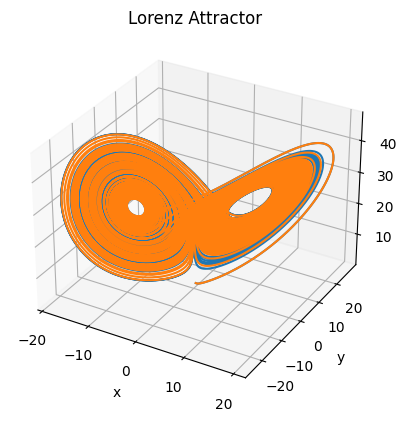

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Runge-Kutta (RK4) Numerical Integration for System of First-Order Differential Equations

# 
def lorenz(_t, _y):
    """
    system of first order differential equations
    _t: discrete time step value
    _y: state vector [y1, y2, y3]
    """
    sigma = 10
    beta = 8 / 3
    rho = 28
    
    return np.array([sigma * (_y[1] - _y[0]), _y[0] * (rho - _y[2]) - _y[1], _y[0] * _y[1] - beta * _y[2]])


def rk4(func, tk, _yk, _dt=0.01, **kwargs):
    """
    single-step fourth-order numerical integration (RK4) method
    func: system of first order ODEs
    tk: current time step
    _yk: current state vector [y1, y2, y3, ...]
    _dt: discrete time step size
    **kwargs: additional parameters for ODE system
    returns: y evaluated at time k+1
    """

    # evaluate derivative at several stages within time interval
    f1 = func(tk, _yk, **kwargs)
    f2 = func(tk + _dt / 2, _yk + (f1 * (_dt / 2)), **kwargs)
    f3 = func(tk + _dt / 2, _yk + (f2 * (_dt / 2)), **kwargs)
    f4 = func(tk + _dt, _yk + (f3 * _dt), **kwargs)

    # return an average of the derivative over tk, tk + dt
    return _yk + (_dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)

# Calculate Lyapunov exponent
def Lyapunov1(eps,t,d):
    L = 1/t*np.log(d/eps)
    return L


# ==============================================================
# simulation harness

dt = 0.001
time = np.arange(1.0, 100.0 + dt, dt)

# second order system initial conditions [y1, y2] at t = 1
eps = 0.01 #perturbation to two points
y0 = np.array([0, 1,1])
y0p = np.array([0+eps, 1,1]) #perturb in x-direction
# ==============================================================
# propagate state

# simulation results
state_history1 = []
state_history2 = []
# initialize yk
yk1 = y0
yk2 = y0p
# intialize time
t = 0

# approximate y at time t
for t in time:
    state_history1.append(yk1)
    yk1 = rk4(lorenz, t, yk1, dt)
    state_history2.append(yk2)
    yk2 = rk4(lorenz, t, yk2, dt)

# convert list to numpy array
state_history1 = np.array(state_history1)
state_history2 = np.array(state_history2)
d = np.linalg.norm(yk1-yk2)

print(f'y evaluated at time t = {t} seconds: {yk1[0]}')

print(f'y evaluated at time t = {t} seconds (perturbed): {yk2[0]}')
L = Lyapunov1(eps,t,d)
print(f'The Lyapunov exponent of the orbit is: lambda = {L}')
# ==============================================================
# plot history in 3d

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state_history1[:, 0], state_history1[:, 1], state_history1[:, 2])
ax.plot(state_history2[:, 0], state_history2[:, 1], state_history2[:, 2])
ax.set(xlabel='x', ylabel='y', zlabel='z', title='Lorenz Attractor')
plt.show()




We see that the Lyapunov exponent is positive but very close to zero, which means the solution will not converge but is close to the point where the solution would transition into a converging one. 